<a href="https://colab.research.google.com/github/Nivedita74/Classification/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name**    -  **Cardiovascular Risk Prediction**

##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -**   Nivedita

# **Project Summary -**

This project aims to develop a machine learning model for predicting cardiovascular disease (CVD) risk using raw clinical and lifestyle-related data without handling missing values or performing feature selection. Various algorithms, including Logistic Regression, Decision Trees, Random Forest, and Neural Networks, will be trained directly on the dataset to assess risk factors such as age, blood pressure, cholesterol levels, and smoking status. Model performance will be evaluated using metrics like accuracy, precision, recall, and AUC-ROC. The outcome will be a simple predictive tool for preliminary CVD risk assessment, serving as a baseline for future enhancements.

# <b> Problem Description </b>

Cardiovascular diseases (CVDs) are among the leading causes of mortality worldwide, making early risk prediction crucial for prevention and treatment. Traditional risk assessment methods rely on clinical evaluations and statistical models, which may not fully leverage the potential of available patient data. This project aims to develop a machine learning model that predicts CVD risk using raw clinical and lifestyle-related data without handling missing values or performing feature selection. By directly utilizing patient information such as age, blood pressure, cholesterol levels, smoking status, and medical history, the model will help identify individuals at higher risk. The challenge lies in building an effective predictive model that can handle raw, unprocessed data while maintaining acceptable accuracy and reliability for preliminary risk assessment.

#**Github Link**

Provide your GitHub Link here. :

## <b> Data Description </b>

**1. id :**  Unique identifier for each individual in the dataset.

**2. age :** Age of the individual (in years).

**3. sex :** Gender of the individual (1 = Male, 0 = Female).

**4. is_smoking :** Indicates whether the individual is a smoker (1 = Yes, 0 = No).

**5. education :** Educational level of the individual (categorical variable).

**6. cigsPerDay :** Number of cigarettes smoked per day (for smokers).

**7. BPMeds :** Whether the individual is on blood pressure medication (1 = Yes, 0 = No).

**8. prevalentStroke :**  History of stroke (1 = Yes, 0 = No).

**9. prevalentHyp :**  History of hypertension (1 = Yes, 0 = No).

**10. diabetes :**  Whether the individual has diabetes (1 = Yes, 0 = No).

**11. totChol :** Total cholesterol level (mg/dL).

**12. sysBP :** Systolic blood pressure (mmHg).

**13. diaBP :** Diastolic blood pressure (mmHg).

**14. BMI :** Body Mass Index, calculated as weight (kg) / height (m²).

**15. heartRate :** Resting heart rate (beats per minute).

**16.glucose :** Fasting blood glucose level (mg/dL).

**17.TenYearCHD :** Target variable; indicates whether the individual developed coronary heart disease (CHD) within ten years (1 = Yes, 0 = No)

##**Import the dependancy**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from datetime import datetime

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Copy of Copy of data_cardiovascular_risk.csv')

In [ ]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
# Checking for null data
df.isnull().sum()

,0
id,0
age,0
education,87
sex,0
is_smoking,0
cigsPerDay,22
BPMeds,44
prevalentStroke,0
prevalentHyp,0
diabetes,0


##**Handle Missing Value**

In [ ]:
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)

# Display the first few rows to confirm changes
print(df.head())


   id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP        BMI  heartRate  \
0             0         0    221.0  148.0   85.0  25.794964       90.0   
1             1         0    212.0  168.0   98.0  29.770000       72.0   
2             0         0    250.0  116.0   71.0  20.350000       88.0   
3             1         0    233.0  158.0   88.0  28.260000       68.0   
4             0         0    241.0  136.5   85.0  26.420000       70.0   

   glucose  TenYearCHD  
0     80.0           1  
1     75.0           0  
2     94.0       

In [ ]:
df.isnull().sum()

,0
id,0
age,0
education,0
sex,0
is_smoking,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0


* From the above data we can understand that there are no null values present in the data

In [ ]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

### **Identify outliers**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3390.0,1694.500000,978.753033,0.00,847.25,1694.5,2541.7500,3389.0
age,3390.0,49.542183,8.592878,32.00,42.00,49.0,56.0000,70.0
education,3390.0,1.970936,1.005915,1.00,1.00,2.0,3.0000,4.0
cigsPerDay,3390.0,9.069477,11.840458,0.00,0.00,0.0,20.0000,70.0
BPMeds,3390.0,0.029886,0.169190,0.00,0.00,0.0,0.0000,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.0,0.0000,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.0,1.0000,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.0,0.0000,1.0
totChol,3390.0,237.074284,44.993041,107.00,206.00,235.0,264.0000,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.5,144.0000,295.0


In [ ]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
columns = ['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']

In [ ]:
# let's create a function to check the outliers
def check_outliers(columns,df):

  # use plotly for better plot
  for i in columns:
    fig = px.box(df,y=i)
    fig.update_layout(height=500, width=600)
    fig.show()

#**Check Outliers**

In [ ]:
# Plot the graph
check_outliers(columns,df)

* So we have some outliers in plot

### **Make id columns as axis**

In [ ]:
## set id column as index
df.set_index("id",inplace = True)

#print first i rows
df.head(1)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1


##**Let's do Some Analysis on Columns**

In [ ]:
# Create a function for ploting the graph for has deff or not
# Define a function to plot stacked bar chart since there will be multiple stacked bars charts to plot

def create_stacked_bar(column_name):

    # Get the percentage of default by each group
    default_by_group = pd.crosstab(index=df['HAS_DEF'],columns = df[column_name], normalize = 'columns')

    # Round up to 2 decimal
    default_by_group = default_by_group.apply(lambda x: round(x,2))

    labels = default_by_group.columns
    list1 = default_by_group.iloc[0].to_list()
    list2 = default_by_group.iloc[1].to_list()

    list1_name = "No default"
    list2_name = "Has default"
    title = f"Default by {column_name}"
    xlabel = column_name
    ylabel = "Default percentage"

    fig, ax = plt.subplots(figsize=(10, 5))
    bar_width = 0.5

    ax1 = ax.bar(labels,list1, bar_width, label = list1_name)
    ax2 = ax.bar(labels,list2, bar_width, bottom = list1, label = list2_name)

    ax.set_title(title, fontweight = "bold")
    ax.set_xlabel(xlabel, fontweight = "bold")
    ax.set_ylabel(ylabel, fontweight = "bold")
    ax.legend(loc="best")

    plt.xticks(list(range(len(labels))), labels,rotation=90)
    plt.yticks(fontsize=9)

    for r1, r2 in zip(ax1, ax2):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., f"{h1:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")
        plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., f"{h2:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")

    plt.show()

#**1. Age Distribution**

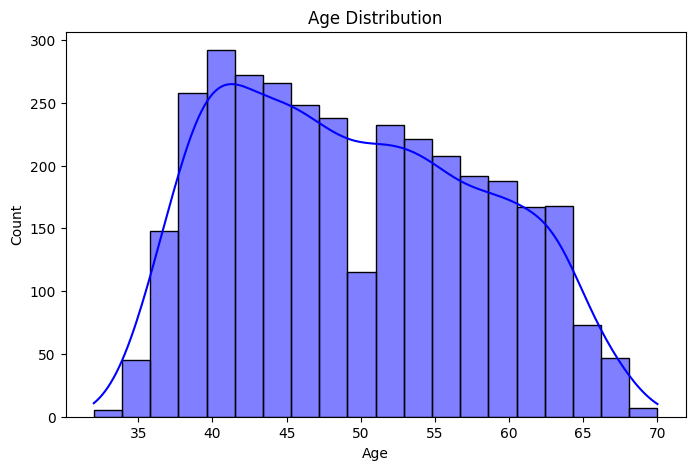

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


* The peak in the histogram around 40–55 years indicates that the majority of individuals at risk for cardiovascular disease fall in this age group.
* Younger individuals are either less likely to be diagnosed as at-risk(>40).

#**2. Smoking vs CHD Risk**

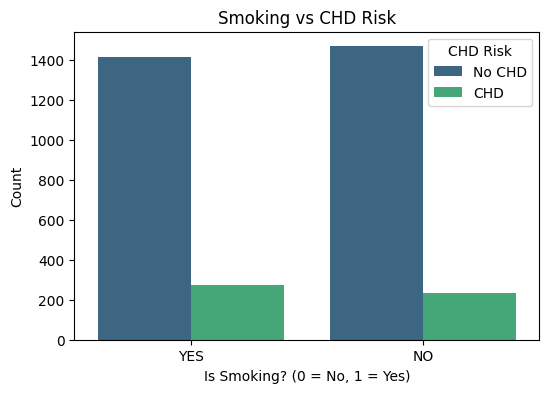

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='is_smoking', hue='TenYearCHD', data=df, palette='viridis')
plt.title('Smoking vs CHD Risk')
plt.xlabel('Is Smoking? (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title="CHD Risk", labels=["No CHD", "CHD"])
plt.show()


* The number of CHD (Coronary Heart Disease) cases is slightly higher among smokers than non-smokers, suggesting a potential link between smoking and increased CHD risk.

* Most individuals in both groups (smokers and non-smokers) do not have CHD, indicating that smoking is a factor but not the sole determinant of CHD.

#**3. Systolic BP vs CHD Risk**

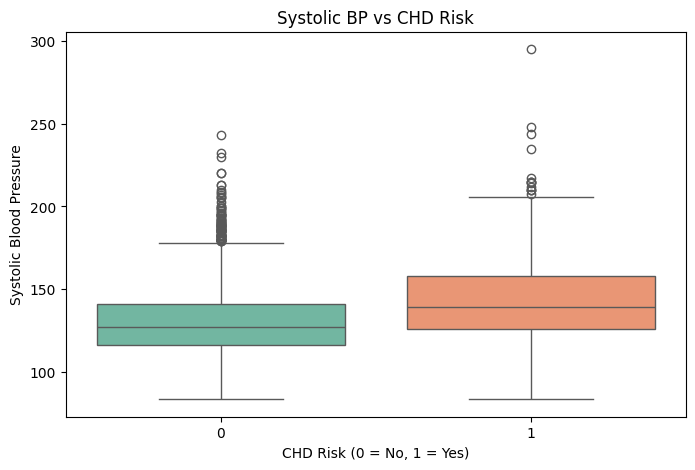

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='TenYearCHD', y='sysBP', data=df, palette='Set2')
plt.title('Systolic BP vs CHD Risk')
plt.xlabel('CHD Risk (0 = No, 1 = Yes)')
plt.ylabel('Systolic Blood Pressure')
plt.show()


* Individuals with CHD (label 1) tend to have higher median systolic blood pressure compared to those without CHD (label 0), suggesting elevated blood pressure is associated with increased CHD risk.

* The CHD group shows more variability and higher upper extremes in systolic blood pressure, indicating that extremely high BP values are more common among individuals at risk.

#**4. Systolic Blood Pressure by Age**

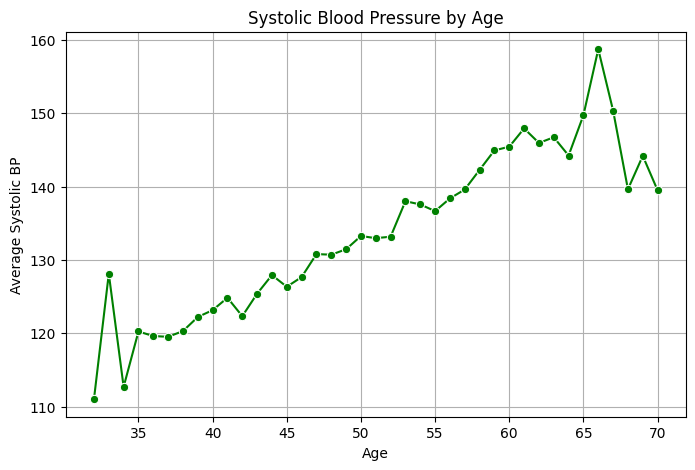

In [ ]:
df_age_bp = df.groupby('age')['sysBP'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(x='age', y='sysBP', data=df_age_bp, marker='o', color='green')
plt.title('Systolic Blood Pressure by Age')
plt.xlabel('Age')
plt.ylabel('Average Systolic BP')
plt.grid(True)
plt.show()


* Systolic blood pressure increases with age: There is a clear upward trend in average systolic BP from age 35 to around 65, indicating that aging is strongly associated with higher blood pressure.

* Slight drop after age 66: After peaking around age 66, average systolic BP shows a noticeable drop and fluctuation, which might be due to fewer data points, medical treatment in older individuals, or survivor bias.

#**5. BMI vs CHD Risk**

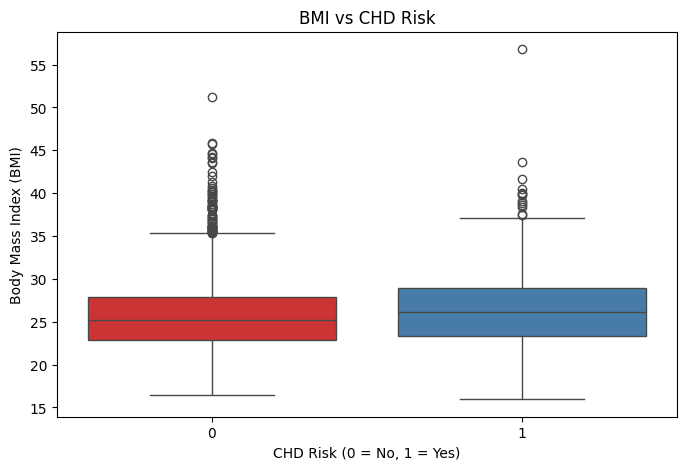

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='TenYearCHD', y='BMI', data=df, palette='Set1')
plt.title('BMI vs CHD Risk')
plt.xlabel('CHD Risk (0 = No, 1 = Yes)')
plt.ylabel('Body Mass Index (BMI)')
plt.show()


* Higher median BMI in CHD group: Individuals with CHD (label 1) have a slightly higher median BMI compared to those without CHD, indicating a possible association between higher BMI and increased CHD risk.

* Similar overall distribution: Despite the slight difference in medians, the overall BMI distribution (range, IQR, and outliers) is quite similar between the two groups, suggesting that BMI alone may not be a strong distinguishing factor for CHD risk in this dataset.

#**6. Systolic BP vs Diastolic BP**

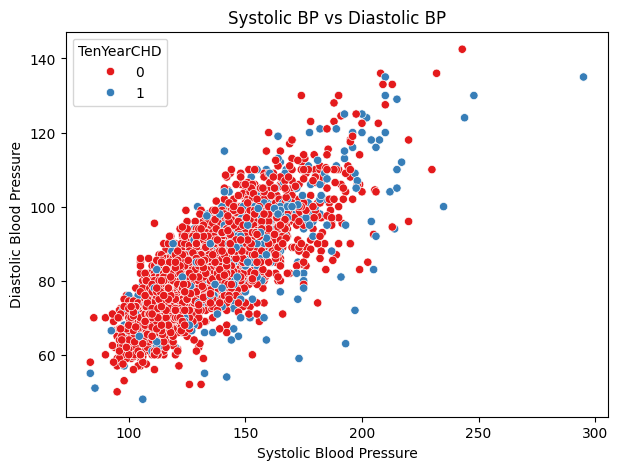

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='sysBP', y='diaBP', hue='TenYearCHD', data=df, palette='Set1')
plt.title('Systolic BP vs Diastolic BP')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Diastolic Blood Pressure')
plt.show()


* Positive correlation: There is a strong positive correlation between systolic and diastolic blood pressure—individuals with higher systolic BP tend to also have higher diastolic BP.

* Higher CHD risk with elevated BP: Blue points (CHD risk = 1) are more concentrated in the upper ranges of both systolic and diastolic BP, indicating that individuals with higher blood pressure are more likely to develop CHD within ten years.

#**7. Cholesterol Levels in Smokers vs Non-Smokers**

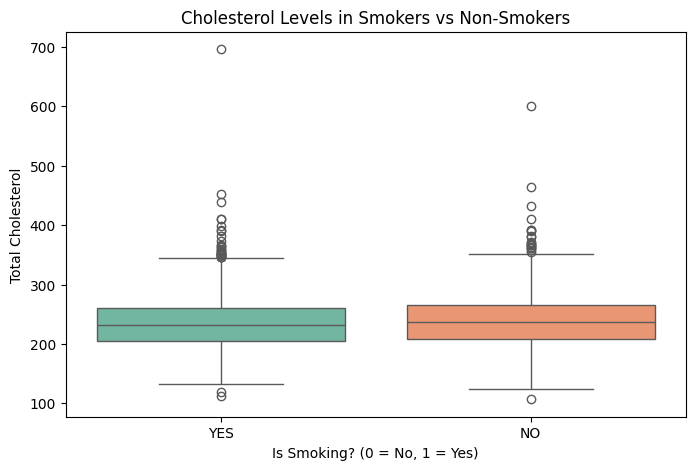

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='is_smoking', y='totChol', data=df, palette='Set2')
plt.title('Cholesterol Levels in Smokers vs Non-Smokers')
plt.xlabel('Is Smoking? (0 = No, 1 = Yes)')
plt.ylabel('Total Cholesterol')
plt.show()


* Similar median cholesterol levels: Both smokers and non-smokers have nearly identical median cholesterol levels, suggesting that smoking may not drastically affect average cholesterol in this dataset.

* Slightly more extreme outliers among smokers: Smokers exhibit a slightly wider range and more high-end outliers in cholesterol levels, indicating that some smokers may be at elevated risk due to exceptionally high cholesterol.

#**8. Cholesterol Levels by Age**

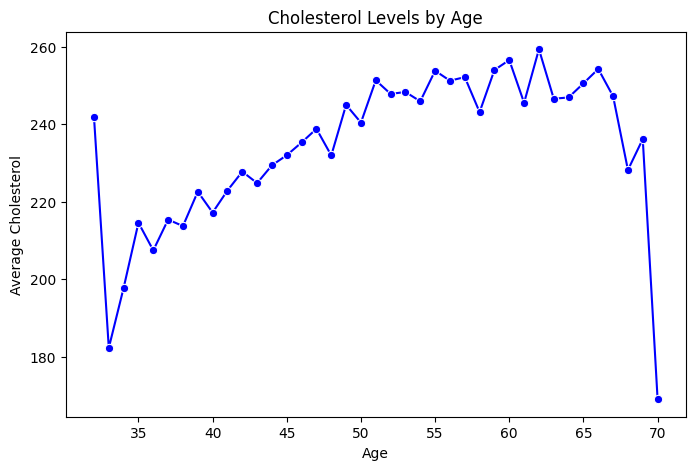

In [ ]:
df_age_chol = df.groupby('age')['totChol'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(x='age', y='totChol', data=df_age_chol, marker='o', color='blue')
plt.title('Cholesterol Levels by Age')
plt.xlabel('Age')
plt.ylabel('Average Cholesterol')
plt.show()


* Cholesterol levels increase with age until early 60s: There is a clear upward trend in average cholesterol from age 35 to around 62, indicating that cholesterol tends to rise with age, peaking in the early 60s.

* Sharp decline after age 65–70: After the peak, there is a noticeable drop in average cholesterol, especially around age 70.

## **EDA Conclusion**
* The peak in the histogram around 40–55 years indicates that the majority of individuals at risk for cardiovascular disease fall in this age group.
* Younger individuals are either less likely to be diagnosed as at-risk(>40).
* While the number of individuals with Coronary Heart Disease (CHD) is relatively similar between smokers and non-smokers, the absolute number of CHD cases is slightly higher among smokers.
* Majority Do Not Have CHD Regardless of Smoking.
* Individuals with CHD (label 1) tend to have higher median systolic blood pressure compared to those without CHD (label 0), suggesting elevated blood pressure is associated with increased CHD risk.
* The CHD group shows more variability and higher upper extremes in systolic blood pressure, indicating that extremely high BP values are more common among individuals at risk.
* There is a clear upward trend in average systolic BP from age 35 to around 65, indicating that aging is strongly associated with higher blood pressure.
* After peaking around age 66, average systolic BP shows a noticeable drop and fluctuation, which might be due to fewer data points, medical treatment in older individuals, or survivor bias.
* Individuals with CHD (label 1) have a slightly higher median BMI compared to those without CHD.
*  Despite the slight difference in medians, the overall BMI distribution (range, IQR, and outliers) is quite similar between the two groups, suggesting that BMI alone may not be a strong distinguishing factor for CHD risk in this dataset.
* Individuals with higher systolic BP tend to also have higher diastolic BP.
* Higher CHD risk with elevated BP.
*  Both smokers and non-smokers have nearly identical median cholesterol levels.
* Cholesterol levels increase with age until early 60s.


#**Pairplot :**

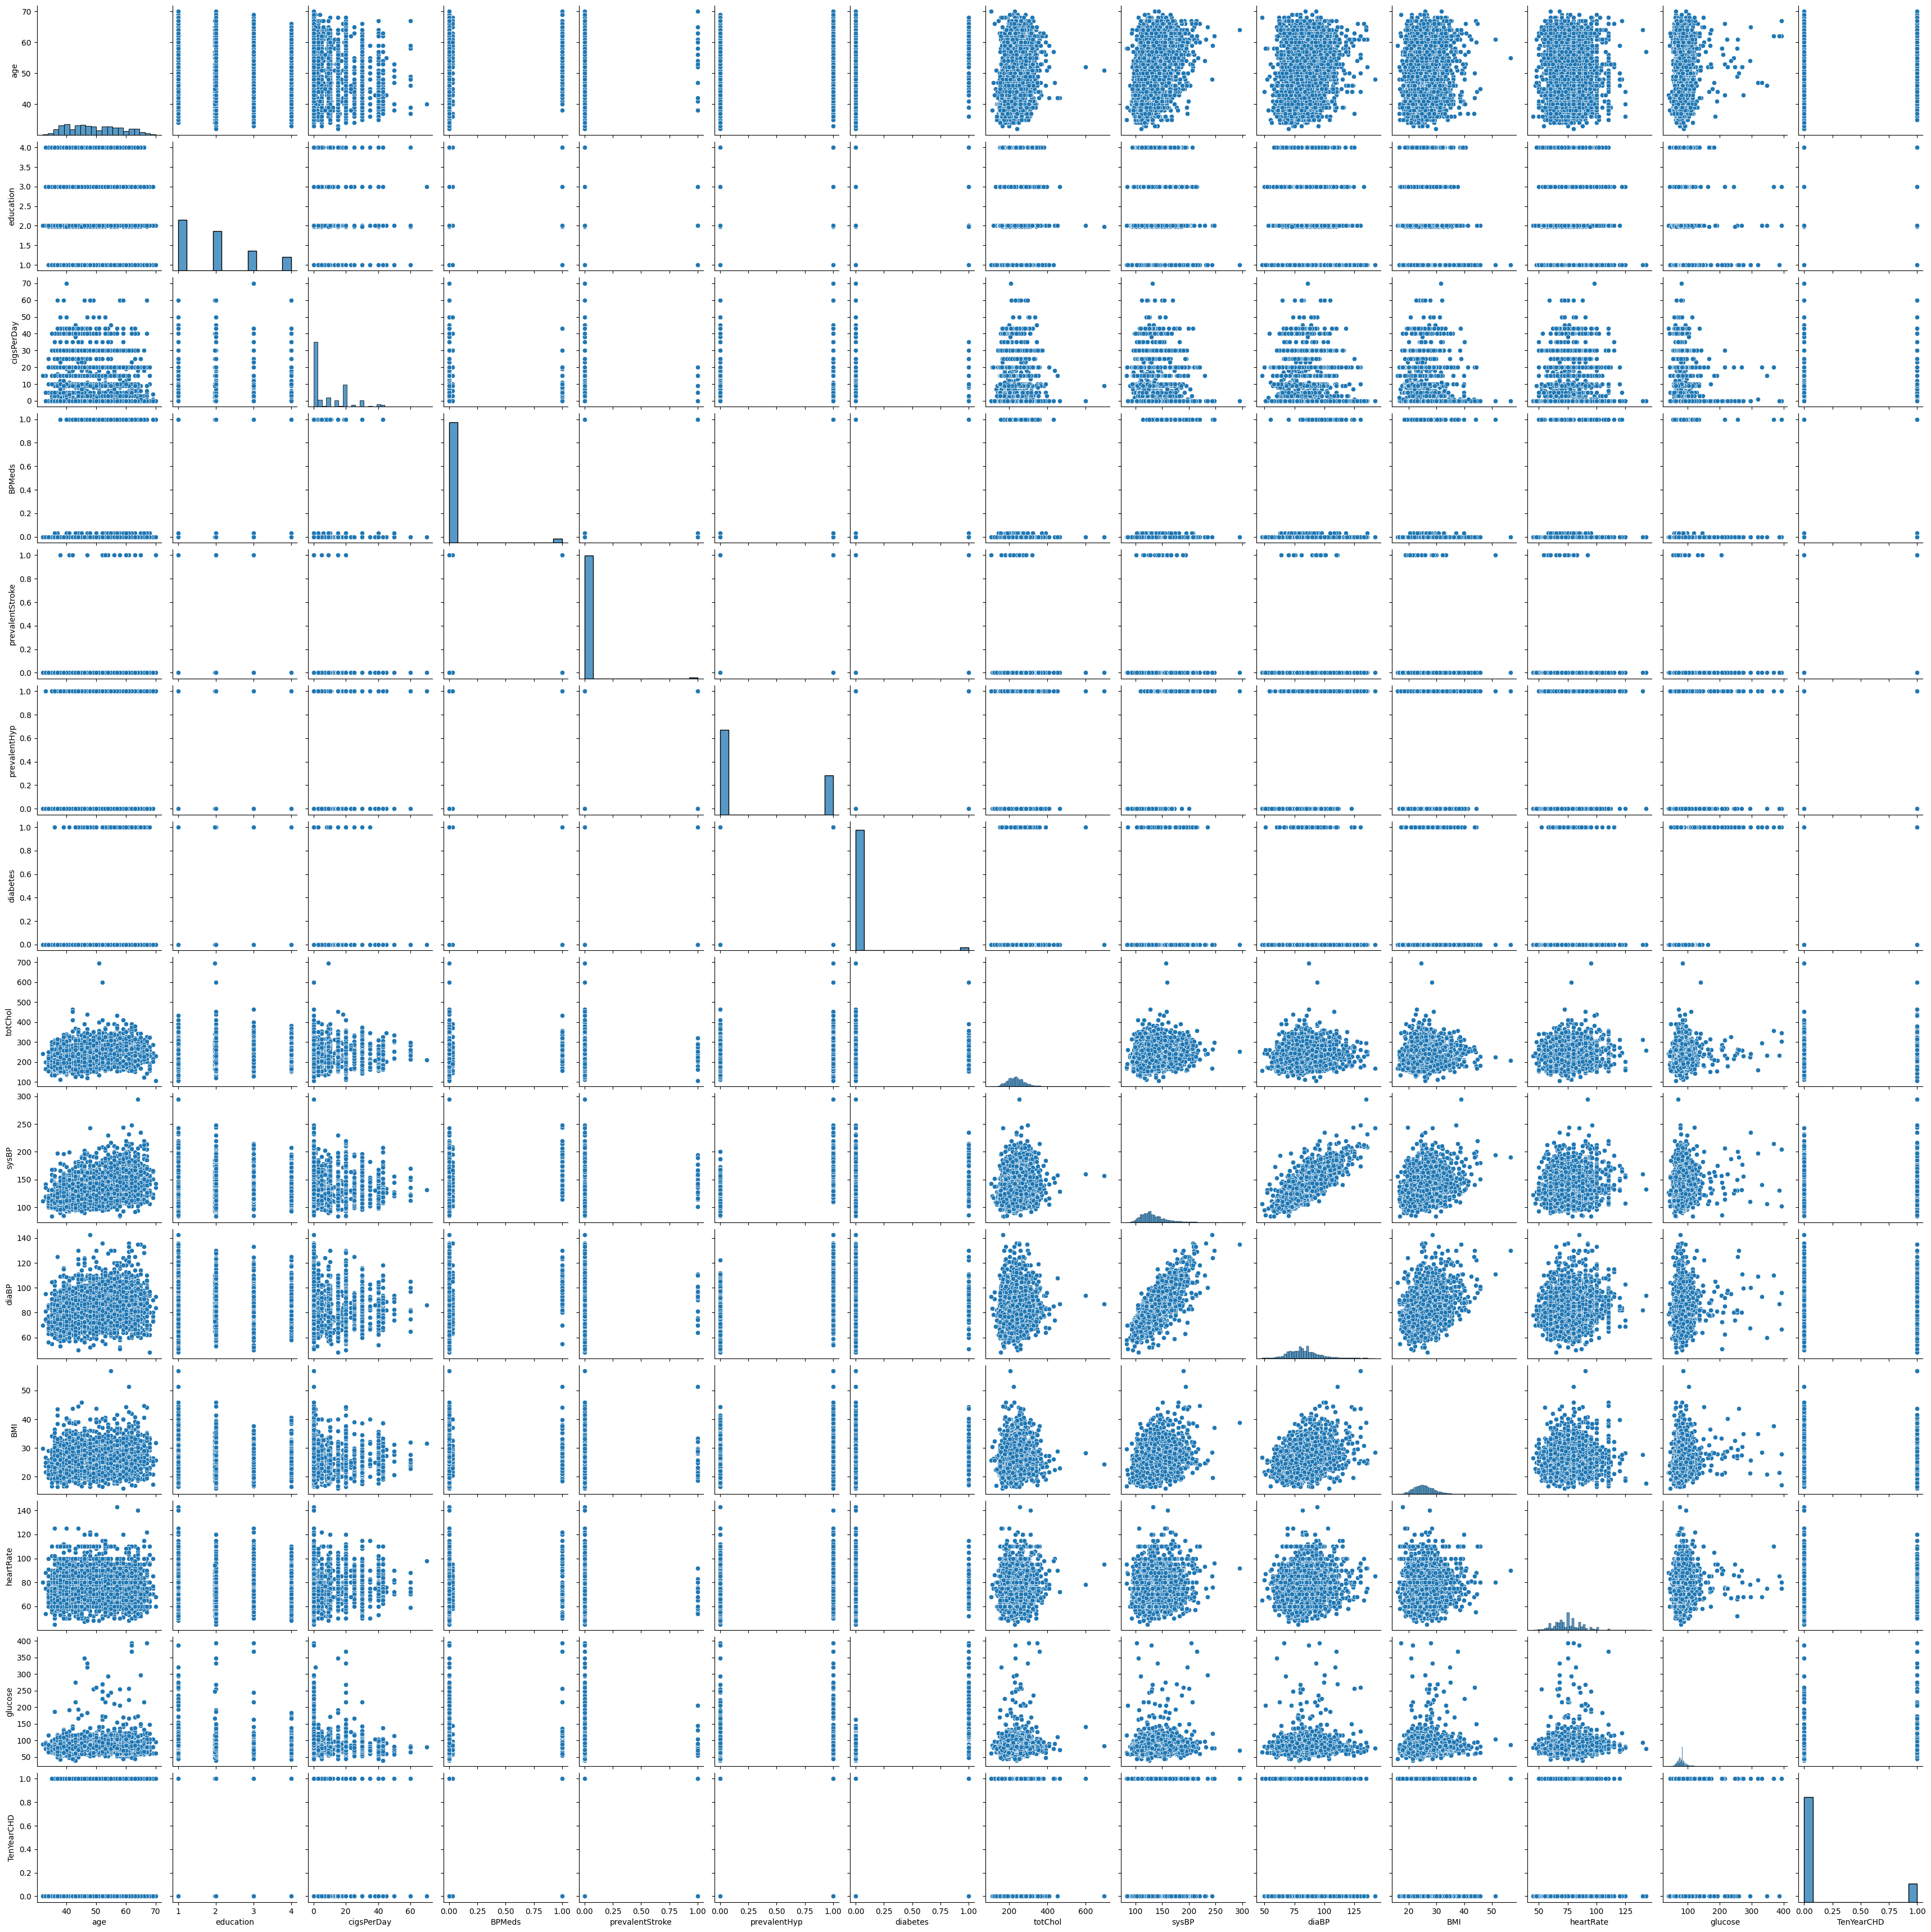

In [ ]:
sns.pairplot(df[[ 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']])

## **Prepare for Modeling**

### **1- One Hot Encoding**

In [ ]:
df.sex

,sex
id,
0,F
1,M
2,F
3,M
4,F
...,...
3385,F
3386,F
3387,M


In [ ]:
df['sex'].value_counts()

,count
sex,
F,1923
M,1467


In [ ]:
df_encoded = pd.get_dummies(df, columns=['sex'], drop_first=True)

In [ ]:
print(df_encoded)

      age  education is_smoking  cigsPerDay    BPMeds  prevalentStroke  \
id                                                                       
0      64        2.0        YES         3.0  0.000000                0   
1      36        4.0         NO         0.0  0.000000                0   
2      46        1.0        YES        10.0  0.000000                0   
3      50        1.0        YES        20.0  0.000000                0   
4      64        1.0        YES        30.0  0.000000                0   
...   ...        ...        ...         ...       ...              ...   
3385   60        1.0         NO         0.0  0.000000                0   
3386   46        1.0         NO         0.0  0.000000                0   
3387   44        3.0        YES         3.0  0.000000                0   
3388   60        1.0         NO         0.0  0.029886                0   
3389   54        3.0         NO         0.0  0.000000                0   

      prevalentHyp  diabetes  totChol

In [ ]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category').cat.codes

print(df)

      age  education  sex  is_smoking  cigsPerDay    BPMeds  prevalentStroke  \
id                                                                             
0      64        2.0    0           1         3.0  0.000000                0   
1      36        4.0    1           0         0.0  0.000000                0   
2      46        1.0    0           1        10.0  0.000000                0   
3      50        1.0    1           1        20.0  0.000000                0   
4      64        1.0    0           1        30.0  0.000000                0   
...   ...        ...  ...         ...         ...       ...              ...   
3385   60        1.0    0           0         0.0  0.000000                0   
3386   46        1.0    0           0         0.0  0.000000                0   
3387   44        3.0    1           1         3.0  0.000000                0   
3388   60        1.0    1           0         0.0  0.029886                0   
3389   54        3.0    0           0   

### **Correlation**

<Axes: >

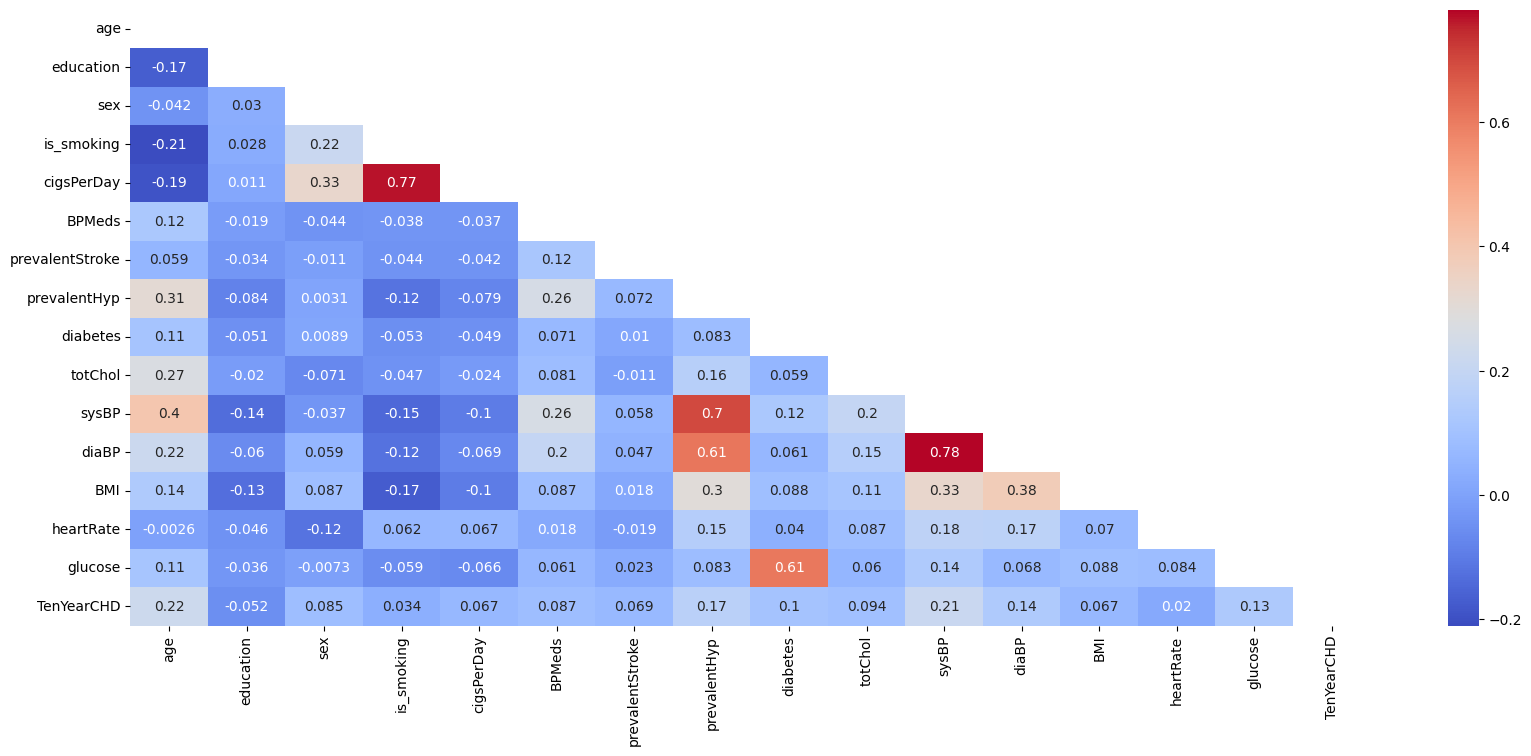

In [ ]:
# Heatmap plot for correlation between different variable
plt.figure(figsize=(20,8))
correlation = df.corr()
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap((correlation),mask=mask,annot=True,cmap='coolwarm')

### **2. Feature Engineering**

In [ ]:
# let's create bins for age
bins= [21,30,40,50,60,70,80]
labels = list(range(6))
df['age'] = pd.cut(df['age'],bins=bins, labels=labels,right=False)

# Convert categorical column into integer by extracting the code of the categories
df.age = df.age.cat.codes


In [ ]:
X = df.drop(['TenYearCHD','BMI'], axis=1)
y = df['TenYearCHD']


In [ ]:
X.isnull().sum()

,0
age,0
education,0
sex,0
is_smoking,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


In [ ]:
X = X.dropna(subset=['heartRate'])

### **4- Split Training and Test Data**

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [ ]:
# Shape of the train and test data
print('Shape of X_train:{}'.format(X_train.shape))
print('Shape of y_train:{}'.format(y_train.shape))
print('Shape of X_test:{}'.format(X_test.shape))
print('Shape of y_test:{}'.format(y_test.shape))

Shape of X_train:(2373, 14)
Shape of y_train:(2373,)
Shape of X_test:(1017, 14)
Shape of y_test:(1017,)


In [ ]:
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]

## **Classification Predictive Modeling(Model - 1)**

### **1. Logistic Regression**

In [ ]:
from sklearn.model_selection import cross_val_score

**SMOTE**

In [ ]:
# Using SMOTE
from imblearn.over_sampling import SMOTE

print('Dataset Before:',y_train.value_counts())
smt = SMOTE()

# fit predictor and target variable
X_train_smt, y_train_smt = smt.fit_resample(X_train,y_train)

print('\nDataset After:',y_train_smt.value_counts())

Dataset Before: TenYearCHD
0    2017
1     356
Name: count, dtype: int64

Dataset After: TenYearCHD
0    2017
1    2017
Name: count, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic_regression = LogisticRegression()
param_grid = {'penalty':['l1','l2'], 'C' : [0.0001,0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 10] }   #set the parmeter

logistic_grid_model = GridSearchCV(logistic_regression, param_grid, scoring = 'precision',n_jobs = -1, verbose = 3, cv = 3)
logistic_grid_model.fit(X_train_smt,y_train_smt)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                               0.6, 0.7, 0.8, 0.9, 1, 10],
                         'penalty': ['l1', 'l2']},
             scoring='precision', verbose=3)

In [ ]:
logistic_grid_model.best_estimator_

LogisticRegression(C=0.001)

In [ ]:
# Best parameters
logistic_grid_model.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [ ]:
# Best score
logistic_grid_model.best_score_

np.float64(0.641796778693037)

In [ ]:
# Predicted results
y_train_pred = logistic_grid_model.predict(X_train_smt)
y_test_pred = logistic_grid_model.predict(X_test)

**Model Evaluation**

In [ ]:
# Importing important matrices
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix

In [ ]:
# Training and testing accuracy
train_accuracy = accuracy_score(y_train_pred, y_train_smt)
test_accuracy = accuracy_score(y_test_pred,y_test)

print('Training accuracy:', train_accuracy)
print('Testing accuracy:', test_accuracy)

Training accuracy: 0.6470004957858205
Testing accuracy: 0.6312684365781711


In [ ]:
# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision,
log_test_precision = precision_score(y_test,y_test_pred)

  # recall,
log_test_recall = recall_score(y_test,y_test_pred,)

  # f1 score
log_f1_score = f1_score(y_test,y_test_pred)

  # roc_auc_score
log_roc_auc_score = roc_auc_score(y_test,y_test_pred)

  # confusion matrix
log_confusion_mat = confusion_matrix(y_test,y_test_pred)

  # Printing all these matrices
print('Precision score of logistic model:',log_test_precision)
print(' ')
print('Recall score of logistic model:', log_test_recall)
print(' ')
print('F1 score of logistic model: ', log_f1_score)
print(' ')
print('ROC AUC score of logistic model: ',log_roc_auc_score)
print(' ')
print('Confusion matrix of logistic model \n:',log_confusion_mat)
print(' ')
labels = ['Not Defaulter','Defaulter']

Precision score of logistic model: 0.21649484536082475
 
Recall score of logistic model: 0.5419354838709678
 
F1 score of logistic model:  0.30939226519337015
 
ROC AUC score of logistic model:  0.5946336352069456
 
Confusion matrix of logistic model 
: [[558 304]
 [ 71  84]]
 


### **RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Parameter distributions
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced']
}

# Create the random search model
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=10,                # Number of random combos to try
    scoring='f1',             # Or 'recall', 'accuracy' depending on goal
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit to training data
random_search.fit(X_train, y_train)

# Best parameters
print("Best Params:", random_search.best_params_)

# Evaluate the best model
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)




print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Params: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 40, 'class_weight': 'balanced'}
Confusion Matrix:
[[795  67]
 [119  36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       862
           1       0.35      0.23      0.28       155

    accuracy                           0.82      1017
   macro avg       0.61      0.58      0.59      1017
weighted avg       0.79      0.82      0.80      1017



In [ ]:
RandomForestClassifier(class_weight='balanced')


RandomForestClassifier(class_weight='balanced')

In [ ]:
from sklearn.metrics import accuracy_score

rd_frst_accuracy = accuracy_score(y_test, y_pred)
print(f"rd_frst_Accuracy: {accuracy:.4f}")

from sklearn.metrics import f1_score

rd_frst_f1 = f1_score(y_test, y_pred)
print(f"rd_frst_F1 Score: {f1:.4f}")

from sklearn.metrics import recall_score, precision_score

rd_frst_recall = recall_score(y_test, y_pred)
rd_frst_precision = precision_score(y_test, y_pred)

print(f"rd_frst_Recall: {recall:.4f}")
print(f"rd_frst_Precision: {precision:.4f}")


rd_frst_Accuracy: 0.7119
rd_frst_F1 Score: 0.2145
rd_frst_Recall: 0.2581
rd_frst_Precision: 0.1835


In [ ]:
#mera coding

In [ ]:
#mera code

##**Naive Bayes**

In [ ]:
#import dependencies
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import numpy as np

# Assuming you already have X_train, y_train, X_test, y_test prepared

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Initialize the Gaussian Naive Bayes classifier
nb_model = GaussianNB()

# Fit the model on the resampled training data
nb_model.fit(X_train_res, y_train_res)

# Predict on the test set
y_pred = nb_model.predict(X_test)

# Evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[708 154]
 [105  50]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.85       862
           1       0.25      0.32      0.28       155

    accuracy                           0.75      1017
   macro avg       0.56      0.57      0.56      1017
weighted avg       0.78      0.75      0.76      1017



In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Accuracy
N_accuracy = accuracy_score(y_test, y_pred)
# Recall
N_recall = recall_score(y_test, y_pred, average='binary')  # use 'macro', 'micro', or 'weighted' for multiclass
# Precision
N_precision = precision_score(y_test, y_pred, average='binary')
# F1 Score
N_f1 = f1_score(y_test, y_pred, average='binary')

print(f"\nAccuracy: {N_accuracy:.4f}")
print(f"Recall: {N_recall:.4f}")
print(f"Precision: {N_precision:.4f}")
print(f"F1 Score: {N_f1:.4f}")


Accuracy: 0.7453
Recall: 0.3226
Precision: 0.2451
F1 Score: 0.2786


##**DecisionTree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 1: Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Step 2: Feature Scaling (optional but can help improve model performance)
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# Step 3: Define the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Step 4: Hyperparameter tuning using GridSearchCV (optional but helps to find the best parameters)
param_grid = {
    'criterion': ['gini', 'entropy'],  # Gini or Entropy
    'max_depth': [None, 10, 20, 30, 40],  # Control overfitting by limiting depth
    'min_samples_split': [2, 5, 10],  # Minimum samples needed to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples needed at leaf nodes
    'max_features': [None, 'sqrt', 'log2'],  # Try different strategies for feature selection
    'class_weight': ['balanced', None]  # Handling imbalanced data
}

# Step 5: Fit GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='f1', verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train_res_scaled, y_train_res)

# Get best parameters
print("Best Parameters:", grid_search.best_params_)

# Step 6: Evaluate the best model
best_dt_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_dt_model.predict(X_test_scaled)

# Step 7: Evaluation metrics (Confusion Matrix and Classification Report)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 540 candidates, totalling 1620 fits
Best Parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Confusion Matrix:
[[684 178]
 [115  40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       862
           1       0.18      0.26      0.21       155

    accuracy                           0.71      1017
   macro avg       0.52      0.53      0.52      1017
weighted avg       0.75      0.71      0.73      1017



In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Accuracy
dt_accuracy = accuracy_score(y_test, y_pred)
# Recall
dt_recall = recall_score(y_test, y_pred, average='binary')  # use 'macro', 'micro', or 'weighted' for multiclass
# Precision
dt_precision = precision_score(y_test, y_pred, average='binary')
# F1 Score
dt_f1 = f1_score(y_test, y_pred, average='binary')

print(f"\nAccuracy: {dt_accuracy:.4f}")
print(f"Recall: {dt_recall:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"F1 Score: {dt_f1:.4f}")


Accuracy: 0.7119
Recall: 0.2581
Precision: 0.1835
F1 Score: 0.2145


##**XGBClassifier**


In [ ]:
# Import xgboost
from xgboost import XGBClassifier

# Fitting XGboost
xgb = XGBClassifier(class_weight = 'balanced',parameters = {'max_depth':7,'eta':1,'silent':1,'eval_metric':'auc'},random_state = 42)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
# Train and test prediction
y_train_xgb_pred = xgb.predict(X_train)
y_test_xgb_pred = xgb.predict(X_test)


# gettig training and testing accuracy
xgb_training_accuracy1 = accuracy_score(y_train_xgb_pred,y_train)
xgb_testing_accuracy1 = accuracy_score(y_test_xgb_pred,y_test)

print(f'Training Accuracy of XGBClassifier: {xgb_training_accuracy1}')
print(f'Testing Accuracy of XGBClassifier: {xgb_testing_accuracy1}')

Training Accuracy of XGBClassifier: 0.9898862199747156
Testing Accuracy of XGBClassifier: 0.8210422812192724


Precision score of XGBoost model: 0.30985915492957744
 
Recall score of XGBoost model: 0.14193548387096774
 
F1 score of XGBoost model:  0.19469026548672566
 
ROC AUC score of XGBoost model:  0.5425454681535813
 
Confusion matrix of XGBoost model 
: [[813  49]
 [133  22]]
 


Text(0.5, 1.0, 'Confusion Matrix of XGBoost Model')

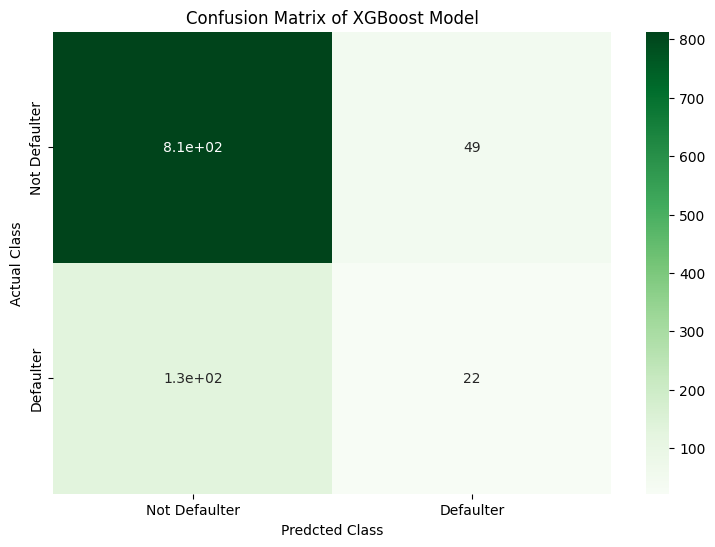

In [ ]:

# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision,
xg_test_precision1 = precision_score(y_test,y_test_xgb_pred)

  # recall,
xg_test_recall1 = recall_score(y_test,y_test_xgb_pred,)

  # f1 score
xg_f1_score1 = f1_score(y_test,y_test_xgb_pred)

  # roc_auc_score
xg_roc_auc_score1 = roc_auc_score(y_test,y_test_xgb_pred)

  # confusion matrix
xg_confusion_mat1 = confusion_matrix(y_test,y_test_xgb_pred)

  # Printing all these matrices
print('Precision score of XGBoost model:',xg_test_precision1)
print(' ')
print('Recall score of XGBoost model:', xg_test_recall1)
print(' ')
print('F1 score of XGBoost model: ', xg_f1_score1)
print(' ')
print('ROC AUC score of XGBoost model: ',xg_roc_auc_score1)
print(' ')
print('Confusion matrix of XGBoost model \n:',xg_confusion_mat1)
print(' ')
labels = ['Not Defaulter','Defaulter']

# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(xg_confusion_mat1,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of XGBoost Model',fontsize = 12)

# **Conclusion:-**


### **Prepare for Modeling**

* we use **pairplots** for understanding the data.

* Also created **bins** for **AGE** columns.

* This dataset is also **imbalanced**.

* We use **SMOTE** because the class is highlly *Imbalance*

### **MODELS -**

* Using a **Logistic Regression** classifier, we can predict with **68.37%** accuracy, whether a customer is likely to default next month.

* Using **Decision Tree** classifier, we can predict with **73.83%** accuracy whether a customer is likely to default next month or not.

* Using **Random Fores**t, we can predict with **78.38%** accuracy whether a customer will be defaulter in next month or not.

* By applying **XGBoost Classifier** with recall **75%**, we can predict with 81.60% accuracy whether a customer is likely to default next month.